# Data Cleaning

In [1]:
def cleanCorruptedFile(data_file,cleanfilename):
    """
    Cleans the corrupted file and produces the new file with clean data.

    Args:
        data_file : data file object with corrupted data
        cleanfilename : name of the new file with clean data
    """
    file1=open(cleanfilename,'w')
    for line in data_file:
        if line.startswith('$%*@'):
            #remove first 4 and last 4 characters and write to new file
            line=line.strip()
            file1.write(line[4:-4]+"\n")
        elif line.startswith('**##'):
            #reverse the line and remove first 4 and last 4 characters and write to new file
            line=line.strip()
            file1.write(line[::-1][4:-4]+"\n")
        #if line starts with !, then ignore the line
        elif line.startswith('!'):
            continue
        else:
            print('None of the criterion met. Please check the line manually.')
            print(line)
    try:
        data_file.close()
        file1.close()
    except:
        print('Error in closing the file')
    return



In [2]:
#clean the data using above function

data_file=open('SC2TGT_ListCorrupted','r')
new_filename='SC2TGT_ListClean'
cleanCorruptedFile(data_file,new_filename)

# Data Visualization

In [3]:
from matplotlib import pyplot as plt


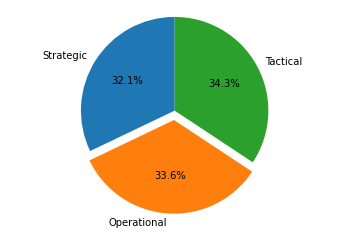

In [4]:

def VisualizeCategories(data_file):
    """ Creates a pie chart to visualize the categories in the data file

    Args:
        data_file : file object which contains the clean data
    """

    category_dict={}
    for line in data_file:
        category=line.split()[7]
        category_dict[category]=category_dict.get(category,0)+1
    # print(category_dict)

    #create a pie chart to visualize the categories and write percentage on the pie chart
    fig1, ax1 = plt.subplots()
    explode=[0]*len(category_dict)
    explode[1]=0.1
    ax1.pie(category_dict.values(),labels=category_dict.keys(),explode=explode,autopct='%1.1f%%',startangle=90)
    ax1.axis('equal')
    plt.savefig('categories_piechart.png',facecolor='white', transparent=False)
    plt.show()
    return


data_file=open('SC2TGT_ListClean','r')
VisualizeCategories(data_file)

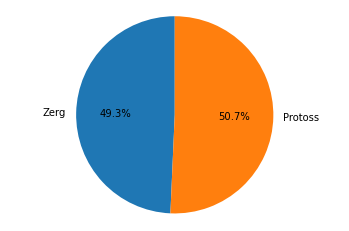

In [5]:
def VisualizeRaces(data_file):
    """ Creates a pie chart to visualize races in the data file

    Args:
        data_file : file object which contains the clean

    """
    races_dict={}
    for line in data_file:
        race=line.split()[1]
        races_dict[race]=races_dict.get(race,0)+1
    
    # print(races_dict)

    #create a pie chart to visualize
    fig1, ax1 = plt.subplots()
    ax1.pie(races_dict.values(),labels=races_dict.keys(),autopct='%1.1f%%',startangle=90)
    ax1.axis('equal')
    plt.savefig("races_pie.png",facecolor='white', transparent=False)
    plt.show()

data_file=open('SC2TGT_ListClean','r')
VisualizeRaces(data_file)

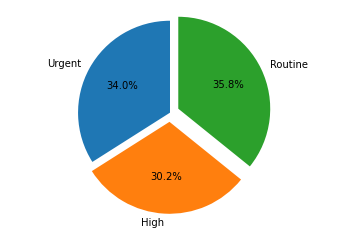

In [6]:
def VisualizePriorities(data_file):
    """ Creates a pie chart to visualize races in the data file

    Args:
        data_file : file object which contains the clean

    """
    priorities_dict={}
    for line in data_file:
        priority=line.split()[2]
        priorities_dict[priority]=priorities_dict.get(priority,0)+1
    
    # print(priorities_dict)

    #create a pie chart to visualize
    fig1, ax1 = plt.subplots()
    explode=[0]*len(priorities_dict)
    explode[1]=0.1
    explode[2]=0.1
    ax1.pie(priorities_dict.values(),labels=priorities_dict.keys(),autopct='%1.1f%%',explode=explode,startangle=90)

    ax1.axis('equal')
    plt.savefig("priorities_pie.png",facecolor='white', transparent=False)
    plt.show()

data_file=open('SC2TGT_ListClean','r')
VisualizePriorities(data_file)
    

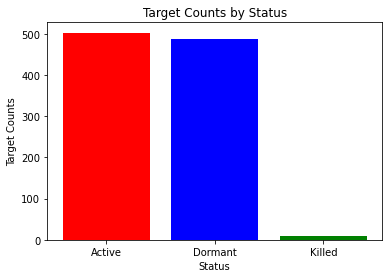

In [7]:
def VisualizeStatus(data_file):
    """ Creates a pie chart to visualize status in the data file """
    
    status_dict={}
    for line in data_file:
        status=line.split()[18]
        status_dict[status]=status_dict.get(status,0)+1
    
    # print(status_dict)
    #plot a bar chart to visualize the status

    fig1, ax1 = plt.subplots()
    ax1.bar(status_dict.keys(),status_dict.values(),color=['red','blue','green'])
    #set the title and labels
    ax1.set_title('Target Counts by Status')
    ax1.set_xlabel('Status')
    ax1.set_ylabel('Target Counts')
    #set different colors for each bar
    plt.savefig("status_bar.png",facecolor='white', transparent=False)
    plt.show()


data_file=open('SC2TGT_ListClean','r')
VisualizeStatus(data_file)

In [8]:
def analyzeTgtDestinations(data_file):
    """Does analysis on the target destination

    Args:
        data_file : file object which contains the clean data
    """
    target_destinations={}
    target_types={}
    target_priorities={}
    target_races={}
    for line in data_file:
        line=line.split()
        target_destination=line[0].split('-')[0]
        target_type=line[9]
        target_priority=line[2]
        target_race=line[1]

        # print(targest_destination)
        # print(target_type)
        # print(target_priority)
        # print(target_race)

        target_destinations[target_destination]=target_destinations.get(target_destination,0)+1
        if target_destination not in target_types:
            target_types[target_destination]={}
        target_types[target_destination][target_type]=target_types[target_destination].get(target_type,0)+1

        if target_destination not in target_priorities:
            target_priorities[target_destination]={}
        target_priorities[target_destination][target_priority]=target_priorities[target_destination].get(target_priority,0)+1

        if target_race not in target_races:
            target_races[target_race]={}
        target_races[target_race][target_destination]=target_races[target_race].get(target_destination,0)+1

    # print(target_destinations)
    # print(target_types)
    # print(target_priorities)
    # print(target_races)

    print("TOTAL TARGETS: ",sum(target_destinations.values()))
    print()
    print("TARGET DESTINATION COUNTS: ",end="\n\t")
    #print in sorted key order
    for key in sorted(target_destinations.keys()):
        print(key+":",target_destinations[key],end="   ")
    print("\n")

    for key in sorted(target_types.keys()):
        print("TARGET TYPE COUNTS {} DESTINATION TARGETS ".format(key),end="\n\t")
        for types in sorted(target_types[key].keys()):
            print(types+":",target_types[key][types],end="   ")
        print()
    print("\n\n")
    for key in sorted(target_priorities.keys()):
        print("TARGET PRIORITY COUNTS {} DESTINATION TARGETS ".format(key),end="\n\t")
        for priority in sorted(target_priorities[key].keys()):
            print(priority+":",target_priorities[key][priority],end="   ")
        print()

    print("\n\n")

    for key in target_races.keys():
        print("{} TARGETS:".format(key),end="\n\t")
        for target in sorted(target_races[key].keys()):
            print(target+":",target_races[key][target],end="   ")
        print()
data_file=open('SC2TGT_ListClean','r')
analyzeTgtDestinations(data_file)

TOTAL TARGETS:  1000

TARGET DESTINATION COUNTS: 
	AA: 167   AB: 164   AC: 149   AD: 173   AE: 149   AF: 198   

TARGET TYPE COUNTS AA DESTINATION TARGETS 
	Barracks: 28   Depot: 20   Fortress: 22   Obstacle: 27   Resource: 22   System: 25   Unit: 23   
TARGET TYPE COUNTS AB DESTINATION TARGETS 
	Barracks: 27   Depot: 18   Fortress: 22   Obstacle: 19   Resource: 24   System: 22   Unit: 32   
TARGET TYPE COUNTS AC DESTINATION TARGETS 
	Barracks: 19   Depot: 23   Fortress: 31   Obstacle: 22   Resource: 22   System: 24   Unit: 8   
TARGET TYPE COUNTS AD DESTINATION TARGETS 
	Barracks: 19   Depot: 29   Fortress: 24   Obstacle: 25   Resource: 17   System: 31   Unit: 28   
TARGET TYPE COUNTS AE DESTINATION TARGETS 
	Barracks: 22   Depot: 17   Fortress: 18   Obstacle: 22   Resource: 23   System: 22   Unit: 25   
TARGET TYPE COUNTS AF DESTINATION TARGETS 
	Barracks: 34   Depot: 24   Fortress: 22   Obstacle: 27   Resource: 31   System: 24   Unit: 36   



TARGET PRIORITY COUNTS AA DESTINATION T

# Data Modelling

In [9]:
from dataclasses import dataclass
@dataclass
class SC2Target:
    """A class to represent a SC2 Target"""
    destination:str
    race:str
    priority:str
    shape:str
    length:int
    width:int
    components:int
    category:str
    surveillance:bool
    ttype:str
    density:str
    mobility:str
    protection:str
    coordinate_x:int
    coordinate_y:int 
    discoveredBy:str
    discovered:int
    health:int
    status:str
    pvalue:int

    def display(self):
        """Displays the target information"""
        print("IDENTIFICATION")
        print("\t TGT ID: {} Race: {} Priority: {}".format(self.destination,self.race,self.priority))
        print("CONFIGURATION")
        print("\t Shape: {} Length: {} Width: {} Aim Points: {}".format(self.shape,self.length,self.width,self.components))
        print("CATEGORY")
        print("Category: {} Surveillance: {} Type: {}".format(self.category,self.surveillance,self.ttype))
        print("TARGETABILITY")
        print("\t Density: {} Mobility: {} Protection: {}".format(self.density,self.mobility,self.protection))
        print("LOCATION")
        print("\t X: {} Y: {}".format(self.coordinate_x,self.coordinate_y))
        print("OBSERVER")
        print("\t Located By: {} Time: {}".format(self.discoveredBy,self.discovered))
        print("VALUE")
        print("\t Health: {} Status: {} Active Value: {}".format(self.health,self.status,self.pvalue))



In [10]:
def buildAllTargets(data_file):
    """Builds a list of all the targets

    Args:
        data_file : file object which contains the clean data
    """
    keys=['destination','race','priority','shape','length','width','components','category','surveillance','ttype','density','mobility','protection','coordinate_x','coordinate_y','discoveredBy','discovered','health','status','pvalue']
    ints=['length','width','components','coordinate_x','coordinate_y','discovered','health','pvalue']
    all_targets=[]
    for line in data_file:
        line=line.split()
        kwargs={}
        for i in range(len(keys)):
            if keys[i] in ints:
                kwargs[keys[i]]=int(line[i])
            elif keys[i]=='surveillance':
                kwargs[keys[i]]=True if line[i]=='True' else False
            else:
                kwargs[keys[i]]=line[i]
        # print(kwargs)
        # break
        all_targets.append(SC2Target(**kwargs))
    return all_targets

data_file=open('SC2TGT_ListClean','r')
all_targets=buildAllTargets(data_file)

In [11]:
def showTarget(target,all_targets):
    """Displays the target information

    Args:
        all_targets : list of all the targets
    """
    for t in all_targets:
        if t.destination==target:
            t.display()
            return
    
    print("Target Does Not Exist")

showTarget('AD-25-2995',all_targets)

IDENTIFICATION
	 TGT ID: AD-25-2995 Race: Zerg Priority: Urgent
CONFIGURATION
	 Shape: Square Length: 62 Width: 121 Aim Points: 7
CATEGORY
Category: Strategic Surveillance: False Type: System
TARGETABILITY
	 Density: Concentrated Mobility: Mobile Protection: Shielded
LOCATION
	 X: 213 Y: 381
OBSERVER
	 Located By: Ground Time: 30
VALUE
	 Health: 29 Status: Active Active Value: 271


In [12]:
def showTgtPriorities(priority,all_targets):
    """
    Displays the count of targets of given priority

    Args:
        priority (str): priority of the target
        all_targets (list): list of all the target objects
    """

    count=0
    races_dict={}
    for t in all_targets:
        if t.priority==priority:
            races_dict[t.race]=races_dict.get(t.race,0)+1
            count+=1
    # print("Total {} Priority Targets: {}".format(priority,count))
    for key in races_dict.keys():
        print("{} Priority {}\n\t Target Count is {}".format(key,priority,races_dict[key]))

    
showTgtPriorities('Routine',all_targets)


Zerg Priority Routine
	 Target Count is 173
Protoss Priority Routine
	 Target Count is 185


# Data Sampling

In [13]:
def randomTgtSampler(all_targets,number):
    """
    Randomly samples the given number of targets

    Args:
        all_targets (list): list of all the target objects
        number (int): number of targets to sample
    """
    import random
    selected_targets=random.sample(all_targets,number)
    print("Sample Size:",number)
    #track 4 stats. Count,Sum of points, min max, mean
    races_stat={}
    for target in selected_targets:
        if target.race not in races_stat.keys():
            races_stat[target.race]={}
        races_stat[target.race]['count']=races_stat[target.race].get('count',0)+1
        races_stat[target.race]['max']=max(races_stat[target.race].get('max',0),target.pvalue)
        races_stat[target.race]['min']=min(races_stat[target.race].get('min',0),target.pvalue)
        races_stat[target.race]['sum']=races_stat[target.race].get('sum',0)+target.pvalue

    #now print the analysis

    print("RACE \t ",end="")
    for key in races_stat.keys():
        print("{}: {}".format(key,races_stat[key]['count']),end="  ")
    print("\n")
    for key in races_stat.keys():
        print("{} Total Target Point Value: {}".format(key,races_stat[key]['sum']))
        print("{} Minimum Target Point Value: {}".format(key,races_stat[key]['min']))
        print("{} Maximum Target Point Value: {}".format(key,races_stat[key]['max']))
        print("{} Mean Target Point Value: {}".format(key,races_stat[key]['sum']/races_stat[key]['count']))
        print("{} Target Point Value Range: {}".format(key,races_stat[key]['max']-races_stat[key]['min']))
        print("\n")


randomTgtSampler(all_targets,10)
    

Sample Size: 10
RACE 	 Zerg: 6  Protoss: 4  

Zerg Total Target Point Value: 3160
Zerg Minimum Target Point Value: 0
Zerg Maximum Target Point Value: 858
Zerg Mean Target Point Value: 526.6666666666666
Zerg Target Point Value Range: 858


Protoss Total Target Point Value: 2069
Protoss Minimum Target Point Value: 0
Protoss Maximum Target Point Value: 886
Protoss Mean Target Point Value: 517.25
Protoss Target Point Value Range: 886


